In [2]:


import cv2
import glob

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#CAMERA CALIBRATION SECTION

#CALIBRATE CAMERA

# prepare object points
nx = 9 #TODO: enter the number of inside corners in x
ny = 6 #TODO: enter the number of inside corners in y

objpoints = [] #3D points for real world
imgpoints = [] #2D points for image space
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# Make a list of calibration images
fnames = glob.glob('./camera_cal/*')

# ITERATE OVER ALL FILES
for fname in fnames:
    img = cv2.imread(fname)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, save corners
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        
#NOW CALIBRATE CAMERA USING OBJECT POINTS AND IMAGE POINTS
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

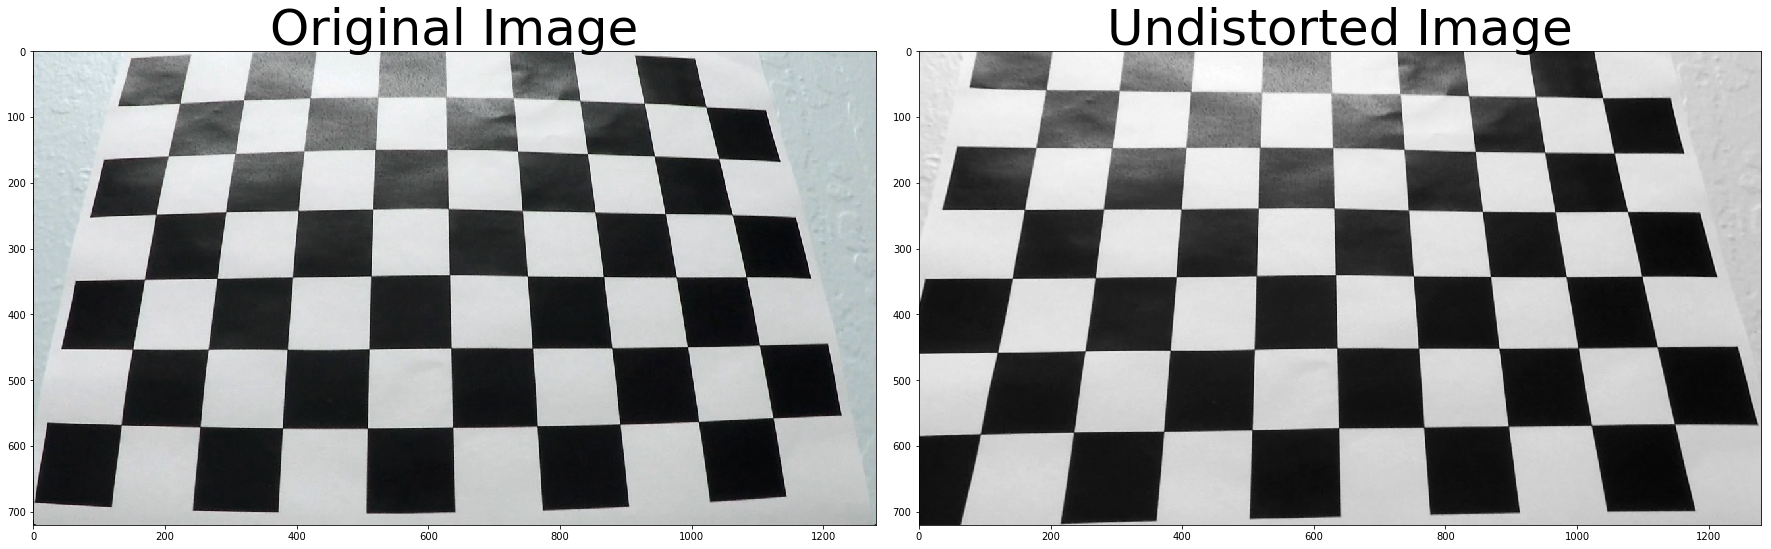

In [2]:
#NOW UNDISTORT ANOTHER IMAGE FROM GLOB

img = cv2.imread(fnames[13])

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Undistort image using matrix
undist_img = cv2.undistort(gray, mtx, dist, None, mtx)

#PLOT BEFORE AND AFTER USING CODE FROM CLASSROOM
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undist_img,cmap='gray')
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


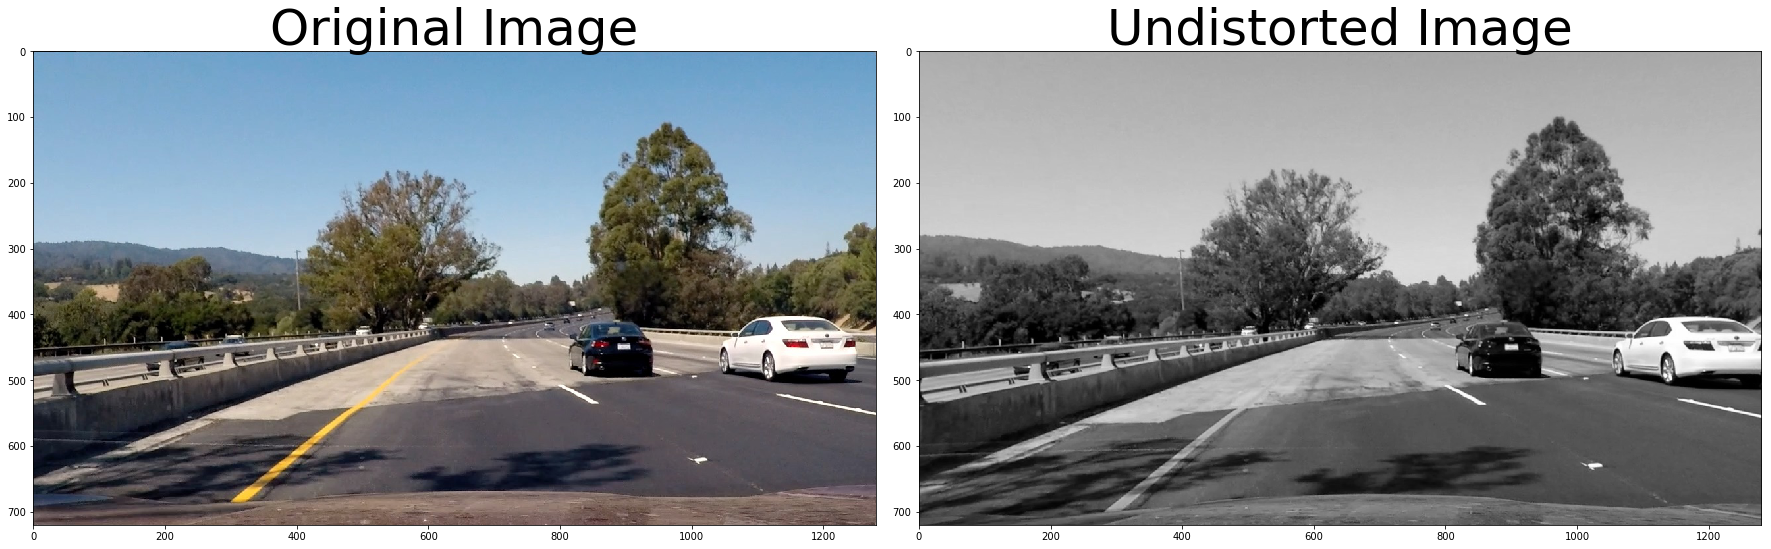

In [10]:
#PIPELINE (TEST IMAGES)
#Section #1: Provide an example of a distortion-corrected image.
img = cv2.imread('./test_images/test4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
undist_img = cv2.undistort(gray, mtx, dist, None, mtx)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undist_img,cmap='gray')
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

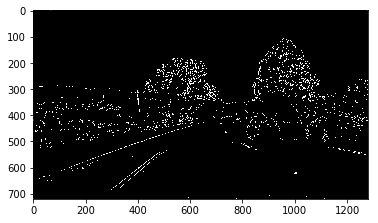

In [9]:
#Section #2: Describe how (and identify where in your code) you used color transforms, gradients or other methods to create a thresholded binary image. Provide an example of a binary image result.

#Define absolute Sobel thresholding
def abs_sobel_thresh(img, orient='x', sobel_kernel = 5, thresh=(30,60)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply cv2.Sobel()
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    if orient == 'y':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    
    # Take the absolute value of the output from cv2.Sobel()
    abs_sobel = np.absolute(sobel)

    # Scale the result to an 8-bit range (0-255)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    # Create binary_output
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1    
    
    binary_output = sbinary

    return binary_output

img = cv2.imread('./test_images/test4.jpg')
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

ASTximg = abs_sobel_thresh(imgRGB, orient='x')
ASTyimg = abs_sobel_thresh(imgRGB, orient='y')

plt.imshow(ASTximg,cmap='gray')


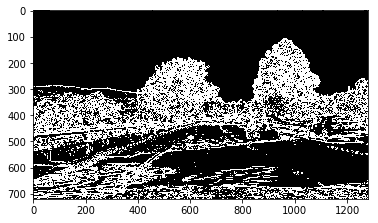

In [8]:
#Define Magnitude function
def mag_thresh(img, sobel_kernel=3, thresh=(10, 100)):
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)    
   
    # 3) Calculate the magnitude 
    sobelmag = np.sqrt(sobelx**2 + sobely**2)
    
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    sobelmagscaled = np.uint8(255*sobelmag/np.max(sobelmag))

    # 5) Create a binary mask where mag thresholds are met
    mag_binary = np.zeros_like(sobelmagscaled)
    mag_binary[(sobelmagscaled >= thresh[0]) & (sobelmagscaled <= thresh[1])] = 1

    # 6) Return this mask as your binary_output image
    return mag_binary

img = cv2.imread('./test_images/test4.jpg')
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_mag = mag_thresh(imgRGB)

plt.imshow(img_mag,cmap='gray')


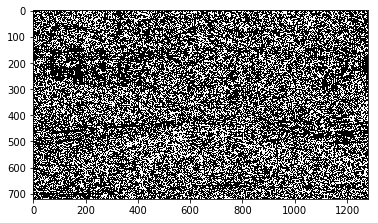

In [7]:
#Define Direction of Gradient function

# Read in an image
image = mpimg.imread('./test_images/test4.jpg')

# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)    
   
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    dir_sobel = np.arctan2(abs_sobely, abs_sobelx)
    
    # 5) Create a binary mask where direction thresholds are met
    dir_binary = np.zeros_like(dir_sobel)
    dir_binary[(dir_sobel >= thresh[0]) & (dir_sobel <= thresh[1])] = 1
       
    # 6) Return this mask as your binary_output image
    return dir_binary

dir_img = dir_threshold(image, sobel_kernel=3, thresh=(0.7, 1.3))
plt.imshow(dir_img, cmap='gray')

In [6]:
## Choose a Sobel kernel size
def combined_binary(image, ksize=7):
    # Apply each of the thresholding functions
    gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(15, 100))
    grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(15, 100))
    mag_binary = mag_thresh(image, sobel_kernel=ksize, thresh=(40, 100))
    dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7, 1.3))

    combined = np.zeros_like(dir_binary)
    combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
    return combined
    #f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 9))
    #f.tight_layout()
    #ax1.imshow(gradx, cmap='gray')
    #ax1.set_title('gradx', fontsize=25)
    #ax2.imshow(grady, cmap='gray')
    #ax2.set_title('grady', fontsize=25)
    #ax3.imshow(mag_binary, cmap='gray')
    #ax3.set_title('mag_binary', fontsize=25)
    #ax4.imshow(dir_binary, cmap='gray')
    #ax4.set_title('dir_binary', fontsize=25)
    #ax5.imshow(combined, cmap='gray')
    #ax5.set_title('combined', fontsize=25)
    #ax6.imshow(dir_binary, cmap='gray')
    #ax6.set_title('dir_binary', fontsize=25)
    #plt.subplots_adjust(left=0., right=1, top=1.1, bottom=0.)




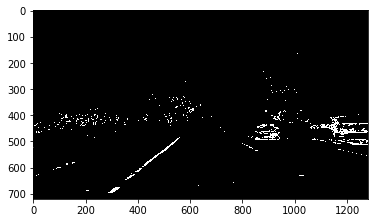

In [4]:
# HLS Conversion and Thresholding
def hls_thresh(img,thresh=(200, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    binaryHLS = np.zeros_like(s_channel)
    binaryHLS[(s_channel > thresh[0]) & (s_channel <= thresh[1])] = 1
    return binaryHLS

img = cv2.imread('./test_images/test4.jpg')
undist_img = cv2.undistort(img, mtx, dist, None, mtx)
binaryHLS = hls_thresh(undist_img)
plt.imshow(binaryHLS,cmap='gray')

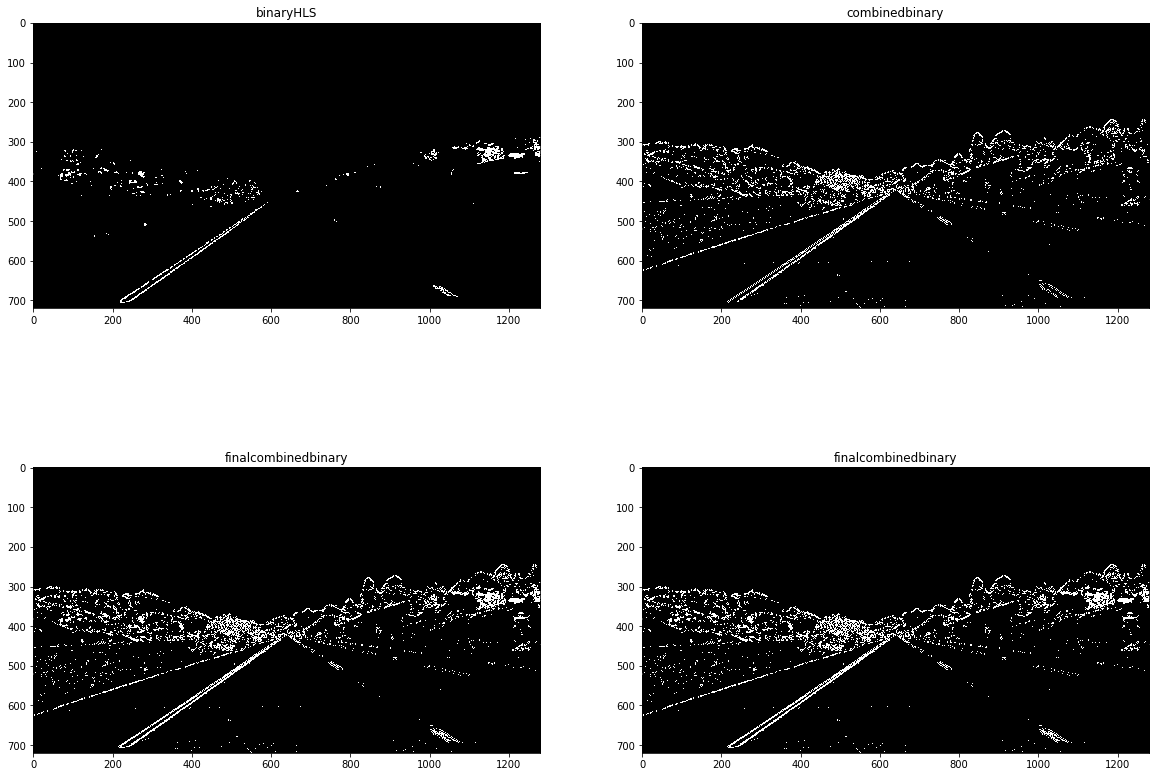

In [11]:
# Combined HLS and Sobel X
img = cv2.imread('./test_images/straight_lines1.jpg')
imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
undist_img = cv2.undistort(img, mtx, dist, None, mtx)
binaryHLS = hls_thresh(undist_img, thresh=(120,230))
combinedbinary = combined_binary(undist_img)

color_binary = np.dstack(( np.zeros_like(binaryHLS), binaryHLS, combinedbinary)) * 255

finalcombinedbinary = np.zeros_like(combinedbinary)
finalcombinedbinary[(combinedbinary == 1) | (binaryHLS == 1)] = 1

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,15))
ax1.set_title('binaryHLS')
ax1.imshow(binaryHLS, cmap='gray')
ax2.set_title('combinedbinary')
ax2.imshow(combinedbinary, cmap='gray')
ax3.set_title('finalcombinedbinary')
ax3.imshow(finalcombinedbinary, cmap='gray')
ax4.set_title('finalcombinedbinary')
ax4.imshow(finalcombinedbinary, cmap='gray')

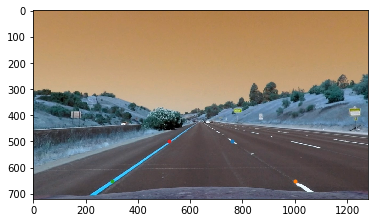

In [13]:
#SHOW ORIGIN POINTS
plt.imshow(undist_img,cmap='gray')
plt.plot(760,500,'.')
plt.plot(1000,650,'.')
plt.plot(300,650,'.')
plt.plot(520,500,'.')

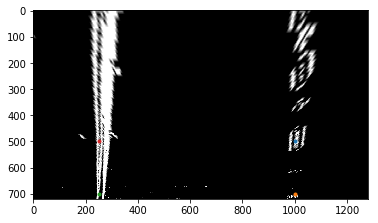

In [14]:
#Section #3: Describe how (and identify where in your code) you performed a perspective transform and provide an example of a transformed image.


src = np.float32([[760,500],[1000,650],[300,650],[520,500]])
dst = np.float32([[1000,500],[1000,700],[250,700],[250,500]])
    
    
M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)
binary_warped = cv2.warpPerspective(finalcombinedbinary, M, (1280,720), flags=cv2.INTER_LINEAR)

plt.imshow(binary_warped, cmap='gray')

plt.plot(1000,500,'.')
plt.plot(1000,700,'.')
plt.plot(250,700,'.')
plt.plot(250,500,'.')


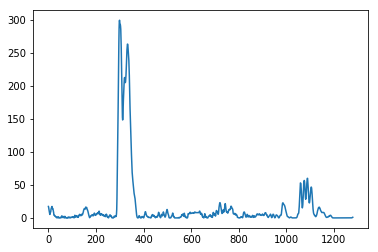

In [12]:
#CHECK LANE LINES HISTOGRAM
histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
plt.plot(histogram)

In [15]:
#Section #4: Describe how (and identify where in your code) you identified lane-line pixels and fit their positions with a polynomial?

# Assuming you have created a warped binary image called "binary_warped"
# Take a histogram of the bottom half of the image
histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
# Create an output image to draw on and  visualize the result
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
# Find the peak of the left and right halves of the histogram
# These will be the starting point for the left and right lines
midpoint = np.int(histogram.shape[0]//2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

# Choose the number of sliding windows
nwindows = 9
# Set height of windows
window_height = np.int(binary_warped.shape[0]//nwindows)
# Identify the x and y positions of all nonzero pixels in the image
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base
# Set the width of the windows +/- margin
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 50
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = binary_warped.shape[0] - (window+1)*window_height
    win_y_high = binary_warped.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
    (0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
    (0,255,0), 2) 
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
    (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
    (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 




28119.2785906 3168.09643995


(720, 0)

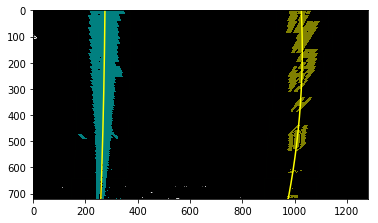

In [16]:
#Section #5: Describe how (and identify where in your code) you calculated the radius of curvature of the lane and the position of the vehicle with respect to center.
# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

# Define y-value where we want radius of curvature
# I'll choose the maximum y-value, corresponding to the bottom of the image
y_eval = np.max(ploty)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)
# Example values: 1926.74 1908.48


out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 128, 128]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [128, 128, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

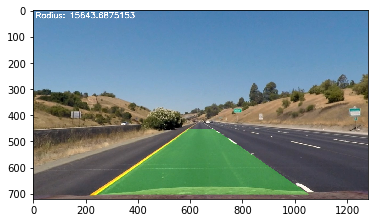

In [17]:
#Section #6: Provide an example image of your result plotted back down onto the road such that the lane area is identified clearly.

warpedBGR = cv2.undistort(img, mtx, dist, None, mtx)
warpedRGB = cv2.cvtColor(warpedBGR, cv2.COLOR_BGR2RGB)
warped = np.copy(binary_warped)

# Create an image to draw the lines on
warp_zero = np.zeros_like(warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(warpedRGB, 1, newwarp, 0.3, 0)
font = cv2.FONT_HERSHEY_SIMPLEX
radiusavg = np.mean([left_curverad, right_curverad])
cv2.putText(result,'Radius: ' + str(radiusavg),(10,30), font, 1,(255,255,255),2,cv2.LINE_AA)
plt.imshow(result)

In [17]:
#PIPELINE (VIDEO) SECTION
#Provide a link to your final video output. Your pipeline should perform reasonably well on the entire project video (wobbly lines are ok but no catastrophic failures that would cause the car to drive off the road!)

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

def process_image(img):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)

    imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    undist_img = cv2.undistort(img, mtx, dist, None, mtx)
    binaryHLS = hls_thresh(undist_img, thresh=(120,230))
    combinedbinary = combined_binary(undist_img)

    color_binary = np.dstack(( np.zeros_like(binaryHLS), binaryHLS, combinedbinary)) * 255

    finalcombinedbinary = np.zeros_like(combinedbinary)
    finalcombinedbinary[(combinedbinary == 1) | (binaryHLS == 1)] = 1
    
    
    
    src = np.float32([[760,500],[1000,650],[300,650],[520,500]])
    dst = np.float32([[1000,500],[1000,700],[250,700],[250,500]])


    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)

    binary_warped = cv2.warpPerspective(finalcombinedbinary, M, (1280,720), flags=cv2.INTER_LINEAR)

    
    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
        (0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
        (0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 128, 128]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [128, 128, 255]
    #plt.imshow(out_img)
    #plt.plot(left_fitx, ploty, color='yellow')
    #plt.plot(right_fitx, ploty, color='yellow')
    #plt.xlim(0, 1280)
    #plt.ylim(720, 0)
    
    # Define y-value where we want radius of curvature
    # I'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty)
    left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])

    warpedBGR = cv2.undistort(img, mtx, dist, None, mtx)
    #warpedRGB = cv2.cvtColor(warpedBGR, cv2.COLOR_BGR2RGB)
    warped = np.copy(binary_warped)

    # Create an image to draw the lines on
    warp_zero = np.zeros_like(warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(warpedBGR, 1, newwarp, 0.3, 0)
    font = cv2.FONT_HERSHEY_SIMPLEX
    radiusavg = np.mean([left_curverad, right_curverad])
    cv2.putText(result,'Radius: ' + str(radiusavg),(10,30), font, 1,(255,255,255),2,cv2.LINE_AA)

    
    #plt.imshow(result)
    
    
    return result

In [18]:
output = 'output_images/project_video_output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
#clip1 = VideoFileClip("project_video.mp4").subclip(20,23)
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(output, audio=False)

[MoviePy] >>>> Building video output_images/project_video_output.mp4
[MoviePy] Writing video output_images/project_video_output.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [17:56<00:00,  1.38it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_images/project_video_output.mp4 

Wall time: 18min


In [19]:
output = 'output_images/challenge_video_output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
#clip1 = VideoFileClip("project_video.mp4").subclip(20,42)
clip1 = VideoFileClip("challenge_video.mp4")#.subclip(0,5)
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(output, audio=False)

[MoviePy] >>>> Building video output_images/challenge_video_output.mp4
[MoviePy] Writing video output_images/challenge_video_output.mp4


100%|████████████████████████████████████████████████████████████████████████████████| 485/485 [05:43<00:00,  1.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_images/challenge_video_output.mp4 

Wall time: 5min 47s


In [ ]:
output = 'output_images/harder_challenge_video_output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
#clip1 = VideoFileClip("project_video.mp4").subclip(20,42)
clip1 = VideoFileClip("harder_challenge_video.mp4")#.subclip(0,5)
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(output, audio=False)

[MoviePy] >>>> Building video output_images/harder_challenge_video_output.mp4
[MoviePy] Writing video output_images/harder_challenge_video_output.mp4


100%|█████████████████████████████████████████████████████████████████████████████▊| 1198/1200 [17:06<00:02,  1.09s/it]